In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
x=pd.read_csv("Coffe_sales.csv")
x

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,01/03/2024,01/03/2024 10:15:51,10,card,ANON-0000-0000-0001,R38.70,Latte,Morning,Fri,Mar,5,3
1,01/03/2024,01/03/2024 12:19:23,12,card,ANON-0000-0000-0002,R38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,01/03/2024,01/03/2024 12:20:18,12,card,ANON-0000-0000-0002,R38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,01/03/2024,01/03/2024 13:46:33,13,card,ANON-0000-0000-0003,R28.90,Americano,Afternoon,Fri,Mar,5,3
4,01/03/2024,01/03/2024 13:48:15,13,card,ANON-0000-0000-0004,R38.70,Latte,Afternoon,Fri,Mar,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,23/03/2025,23/03/2025 10:34:55,10,card,ANON-0000-0000-1158,R35.76,Cappuccino,Morning,Sun,Mar,7,3
3632,23/03/2025,23/03/2025 14:43:37,14,card,ANON-0000-0000-1315,R35.76,Cocoa,Afternoon,Sun,Mar,7,3
3633,23/03/2025,23/03/2025 14:44:17,14,card,ANON-0000-0000-1315,R35.76,Cocoa,Afternoon,Sun,Mar,7,3
3634,23/03/2025,23/03/2025 15:47:29,15,card,ANON-0000-0000-1316,R25.96,Americano,Afternoon,Sun,Mar,7,3


In [2]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3636 non-null   object
 1   datetime     3636 non-null   object
 2   hour_of_day  3636 non-null   int64 
 3   cash_type    3636 non-null   object
 4   card         3547 non-null   object
 5   money        3636 non-null   object
 6   coffee_name  3636 non-null   object
 7   Time_of_Day  3636 non-null   object
 8   Weekday      3636 non-null   object
 9   Month_name   3636 non-null   object
 10  Weekdaysort  3636 non-null   int64 
 11  Monthsort    3636 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 341.0+ KB


In [3]:
x.isnull().sum()

,0
date,0
datetime,0
hour_of_day,0
cash_type,0
card,89
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0


In [4]:
x["card"].dropna()

,card
0,ANON-0000-0000-0001
1,ANON-0000-0000-0002
2,ANON-0000-0000-0002
3,ANON-0000-0000-0003
4,ANON-0000-0000-0004
...,...
3631,ANON-0000-0000-1158
3632,ANON-0000-0000-1315
3633,ANON-0000-0000-1315
3634,ANON-0000-0000-1316


In [5]:
x['date'] = pd.to_datetime(x['date'], format='%d/%m/%Y')
x.set_index('date', inplace=True)
display(x.head())

,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
date,,,,,,,,,,,
2024-03-01,01/03/2024 10:15:51,10,card,ANON-0000-0000-0001,R38.70,Latte,Morning,Fri,Mar,5,3
2024-03-01,01/03/2024 12:19:23,12,card,ANON-0000-0000-0002,R38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
2024-03-01,01/03/2024 12:20:18,12,card,ANON-0000-0000-0002,R38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
2024-03-01,01/03/2024 13:46:33,13,card,ANON-0000-0000-0003,R28.90,Americano,Afternoon,Fri,Mar,5,3
2024-03-01,01/03/2024 13:48:15,13,card,ANON-0000-0000-0004,R38.70,Latte,Afternoon,Fri,Mar,5,3


In [6]:
daily_sales = x.groupby('date')['money'].sum().value_counts()
display(daily_sales.head())

,count
money,
R32.82,2
R37.72,2
R32.82R32.82,2
R30.86R35.76R35.76R35.76,2
R37.72R37.72R37.72R37.72R37.72R32.82,2


In [7]:
x['money'] = x['money'].str.replace('R', '').astype(float)
display(x.head())

,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
date,,,,,,,,,,,
2024-03-01,01/03/2024 10:15:51,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
2024-03-01,01/03/2024 12:19:23,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2024-03-01,01/03/2024 12:20:18,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2024-03-01,01/03/2024 13:46:33,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
2024-03-01,01/03/2024 13:48:15,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


In [8]:
daily_sales = x.groupby('date')['money'].sum().value_counts()
display(daily_sales.head())

,count
money,
169.00,5
272.84,5
313.50,5
261.58,4
204.76,4


In [9]:
product_sales= x.groupby("coffee_name")["money"].sum().sort_values(ascending=False)
display(product_sales.head())

,money
coffee_name,
Latte,27866.30
Americano with Milk,25269.12
Cappuccino,18034.14
Americano,15062.26
Hot Chocolate,10172.46


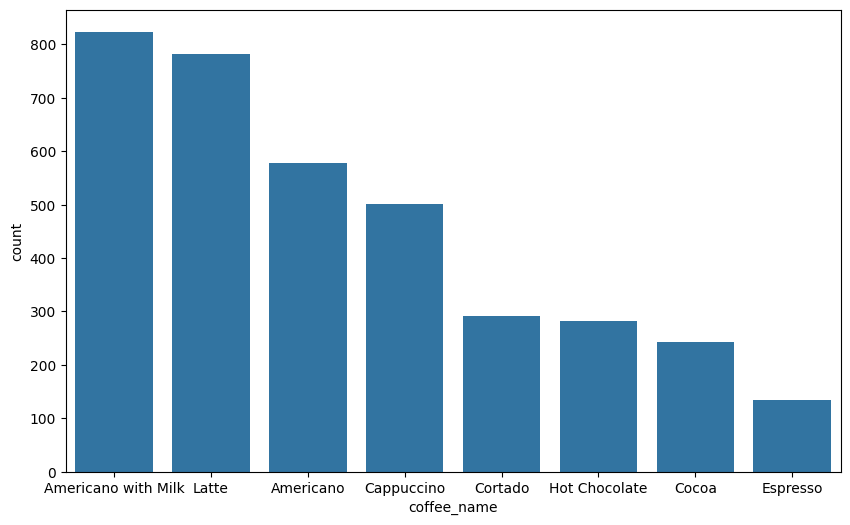

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data = x , x = "coffee_name" , order = x["coffee_name"].value_counts().index)
plt.show()

This visualization is a bar plot showing the count of each coffee name in the dataset. It helps us see which coffee names are the most and least frequent in the sales data. From this plot, we can identify the most popular coffee names based on the number of times they appear in the dataset.

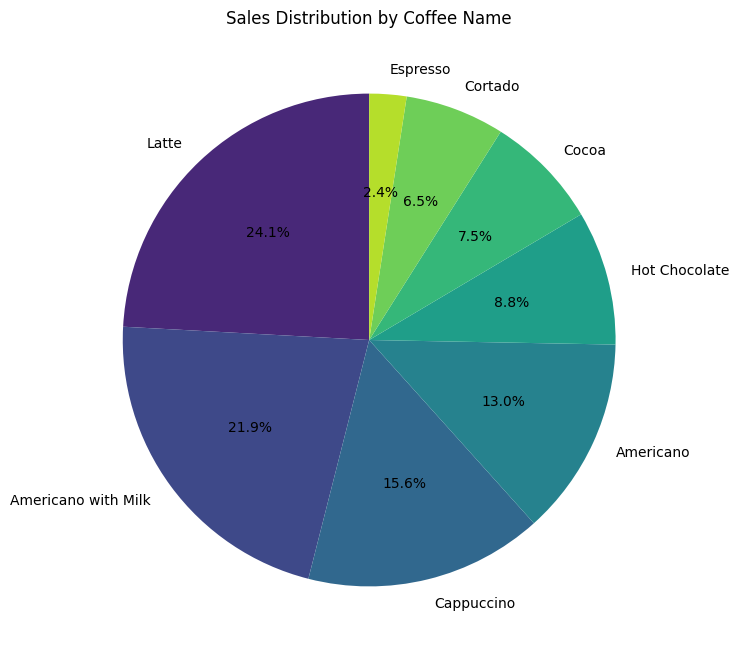

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(product_sales)))
plt.title('Sales Distribution by Coffee Name')
plt.show()

this pie chart shows the distribution of total sales revenue across different coffee names. Each slice represents a coffee name, and the size of the slice corresponds to the percentage of total sales that coffee name contributed. This visualization helps us understand which coffee names are the biggest drivers of revenue.

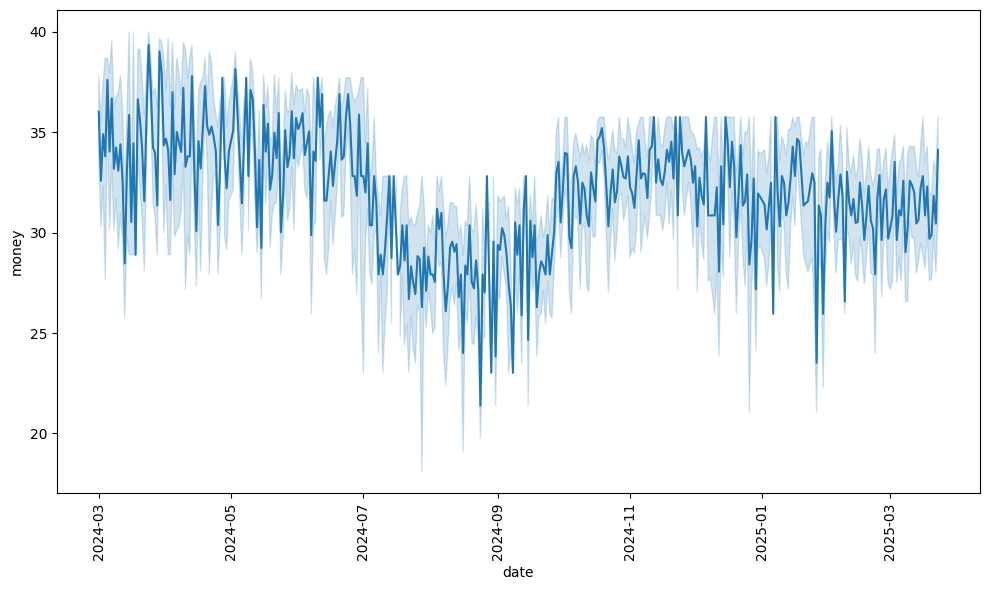

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x = "date" , y = "money" , data = x)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

This line chart displays the trend of daily sales over time. The x-axis represents the date, and the y-axis shows the total sales amount for each day. By looking at this chart, you can observe how sales fluctuate on a daily basis and potentially identify any patterns, peaks, or dips in sales over the recorded period.

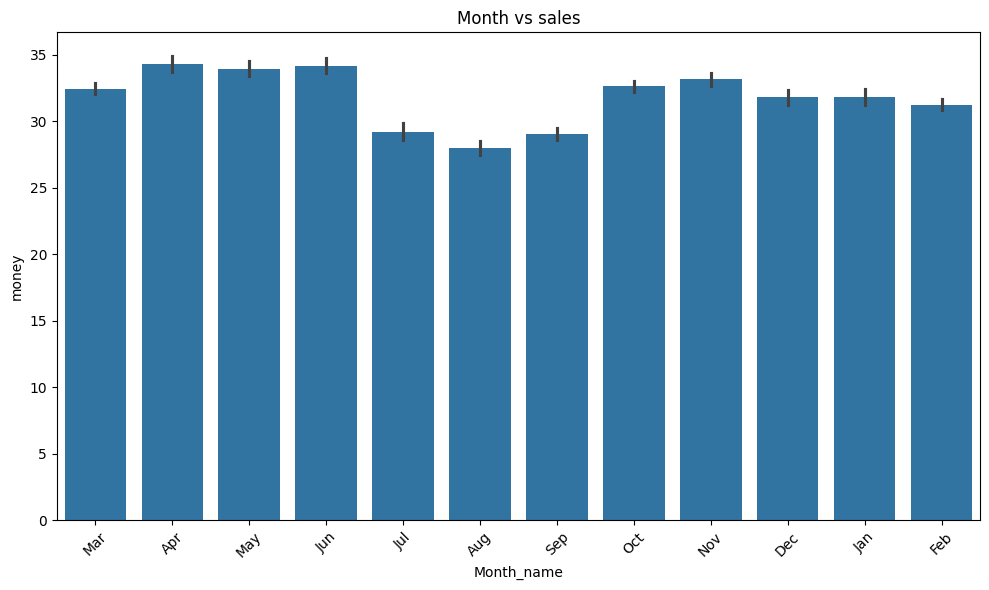

In [13]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Month_name" , y = "money" , data =x)
plt.title("Month vs sales")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

The last visualization is a bar plot showing the average sales for each month. It appears to be titled "Month vs sales"


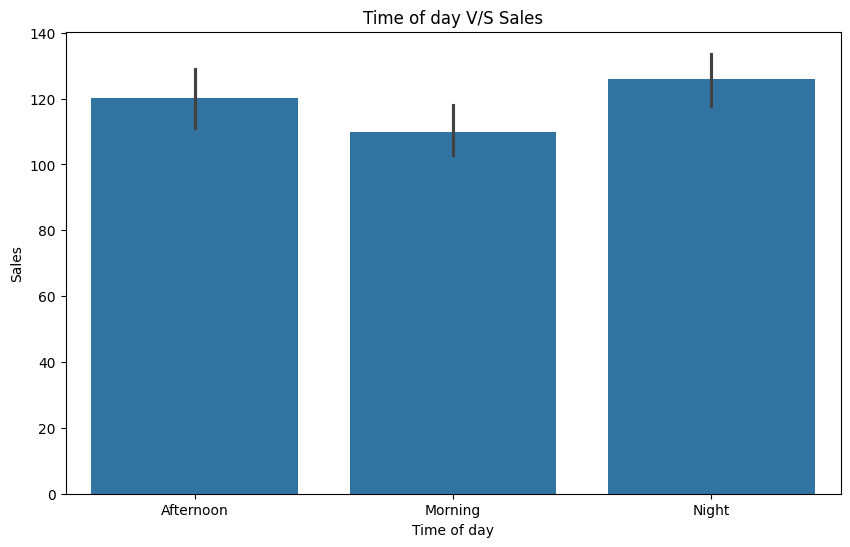

In [14]:
day = x.groupby(["date" , "Time_of_Day"])["money"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x = "Time_of_Day" , y = "money" , data = day)
plt.title("Time of day V/S Sales")
plt.xlabel("Time of day")
plt.ylabel("Sales")
plt.show()

it shows which time of the day has the best sales

In [15]:
average_money = x['money'].mean()
print(f"The average sales amount is: {average_money:.2f}")

The average sales amount is: 31.75


In [16]:
average_money = x['money'].mean()
x['sales_category'] = x['money'].apply(lambda x: 'high sales' if x > average_money else 'low sales')
display(x[['money', 'sales_category']].head())
display(x['sales_category'].value_counts())

,money,sales_category
date,,
2024-03-01,38.7,high sales
2024-03-01,38.7,high sales
2024-03-01,38.7,high sales
2024-03-01,28.9,low sales
2024-03-01,38.7,high sales


,count
sales_category,
high sales,2021
low sales,1615


converting money column from numerical to category to see if the sales above 31.75$ would be high sales and under it would be low

In [17]:
x['day_of_year'] = x.index.dayofyear
x_poly = pd.DataFrame(x['day_of_year'])
x_poly['day_of_year_sq'] = x_poly['day_of_year']**2
y = x['money']
display(x_poly.head())
display(y.head())

,day_of_year,day_of_year_sq
date,,
2024-03-01,61,3721
2024-03-01,61,3721
2024-03-01,61,3721
2024-03-01,61,3721
2024-03-01,61,3721


,money
date,
2024-03-01,38.7
2024-03-01,38.7
2024-03-01,38.7
2024-03-01,28.9
2024-03-01,38.7


In [18]:
from sklearn.preprocessing import LabelEncoder

X = x_poly[['day_of_year', 'day_of_year_sq']]
y = x['sales_category']

le = LabelEncoder()
y = le.fit_transform(y)

display(X.head())
display(pd.DataFrame(y, index=x.index, columns=['sales_category']).head())

,day_of_year,day_of_year_sq
date,,
2024-03-01,61,3721
2024-03-01,61,3721
2024-03-01,61,3721
2024-03-01,61,3721
2024-03-01,61,3721


,sales_category
date,
2024-03-01,0
2024-03-01,0
2024-03-01,0
2024-03-01,1
2024-03-01,0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(pd.DataFrame(y_train, index=X_train.index, columns=['sales_category']).head())
display(pd.DataFrame(y_test, index=X_test.index, columns=['sales_category']).head())

,day_of_year,day_of_year_sq
date,,
2025-03-13,72,5184
2024-11-11,316,99856
2024-07-27,209,43681
2024-09-03,247,61009
2025-02-09,40,1600


,day_of_year,day_of_year_sq
date,,
2024-08-15,228,51984
2024-03-16,76,5776
2024-06-21,173,29929
2024-09-12,256,65536
2025-01-31,31,961


,sales_category
date,
2025-03-13,0
2024-11-11,1
2024-07-27,1
2024-09-03,0
2025-02-09,0


,sales_category
date,
2024-08-15,1
2024-03-16,0
2024-06-21,0
2024-09-12,1
2025-01-31,1


In [20]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_lr = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.554945054945055
Precision: 0.4473684210526316
Recall: 0.10759493670886076
F1-score: 0.17346938775510204


the logistic regression model will learn the relationship between the day of the year and whether the sales on that day are likely to be high or low. The model will output a probability that a given sale belongs to the 'high sales' category.

In [22]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Precision: {precision_dt}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"Decision Tree F1-score: {f1_dt}")

Decision Tree Accuracy: 0.5769230769230769
Decision Tree Precision: 0.5158730158730159
Decision Tree Recall: 0.41139240506329117
Decision Tree F1-score: 0.45774647887323944


In [24]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-score: {f1_rf}")

Random Forest Accuracy: 0.5686813186813187
Random Forest Precision: 0.5035460992907801
Random Forest Recall: 0.44936708860759494
Random Forest F1-score: 0.47491638795986624


In [26]:
from sklearn.svm import SVC

model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [27]:
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1-score: {f1_svm}")

SVM Accuracy: 0.5824175824175825
SVM Precision: 0.5275229357798165
SVM Recall: 0.3639240506329114
SVM F1-score: 0.4307116104868914


In [28]:
print("--- Logistic Regression Metrics ---")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

print("\n--- Decision Tree Metrics ---")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")

print("\n--- Random Forest Metrics ---")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")

print("\n--- SVM Metrics ---")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-score: {f1_svm}")

# Identify the best performing model based on F1-score
best_f1_score = max(f1, f1_dt, f1_rf, f1_svm)
if best_f1_score == f1:
    best_model = "Logistic Regression"
elif best_f1_score == f1_dt:
    best_model = "Decision Tree"
elif best_f1_score == f1_rf:
    best_model = "Random Forest"
else:
    best_model = "SVM"

print(f"\nBased on the F1-score, the best performing model is: {best_model}")

--- Logistic Regression Metrics ---
Accuracy: 0.554945054945055
Precision: 0.4473684210526316
Recall: 0.10759493670886076
F1-score: 0.17346938775510204

--- Decision Tree Metrics ---
Accuracy: 0.5769230769230769
Precision: 0.5158730158730159
Recall: 0.41139240506329117
F1-score: 0.45774647887323944

--- Random Forest Metrics ---
Accuracy: 0.5686813186813187
Precision: 0.5035460992907801
Recall: 0.44936708860759494
F1-score: 0.47491638795986624

--- SVM Metrics ---
Accuracy: 0.5824175824175825
Precision: 0.5275229357798165
Recall: 0.3639240506329114
F1-score: 0.4307116104868914

Based on the F1-score, the best performing model is: Random Forest


Based on the analysis, the Random Forest model performed the best at predicting whether a sale is likely to be high or low based on the day of the year. This means that the Random Forest model is the most reliable among the ones we tested for this specific task.

Essentially, we trained different models to learn if there's a pattern between the day of the year and whether sales are good or not. The Random Forest model was the most successful at finding this pattern, giving us the best chance to predict if a particular day will have high or low sales.